# ODISHA

In [469]:
import pandas as pd

# Load the datasets for Odisha
df_od_enrolment = pd.read_csv('/content/Odisha Enrolment State.csv')
df_od_demographic = pd.read_csv('/content/Odisha Demographic State.csv')
df_od_biometric = pd.read_csv('/content/Odisha biometric State.csv')

print("Odisha Enrolment Dataset:")
print(df_od_enrolment.head())
print(df_od_enrolment.info())
print(df_od_enrolment.describe())

print("\nOdisha Demographic Dataset:")
print(df_od_demographic.head())
print(df_od_demographic.info())
print(df_od_demographic.describe())

print("\nOdisha Biometric Dataset:")
print(df_od_biometric.head())
print(df_od_biometric.info())
print(df_od_biometric.describe())

Odisha Enrolment Dataset:
         date   state     district  pincode  age_0_5  age_5_17  age_18_greater
0  01-09-2025  Odisha        Angul   759022        2         0               0
1  01-09-2025  Odisha        Angul   759100        1         1               0
2  01-07-2025  Odisha      Khordha   751024       37        37              13
3  01-07-2025  Odisha  Nabarangpur   764074      327       103              12
4  03-09-2025  Odisha        Angul   759117        1         0               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51433 entries, 0 to 51432
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            51433 non-null  object
 1   state           51433 non-null  object
 2   district        51433 non-null  object
 3   pincode         51433 non-null  int64 
 4   age_0_5         51433 non-null  int64 
 5   age_5_17        51433 non-null  int64 
 6   age_18_greater  51433 non-null  int

In [470]:
# Convert 'date' column to datetime objects
df_od_enrolment['date'] = pd.to_datetime(df_od_enrolment['date'], format='%d-%m-%Y')
df_od_demographic['date'] = pd.to_datetime(df_od_demographic['date'], format='%d-%m-%Y')
df_od_biometric['date'] = pd.to_datetime(df_od_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_enrolment:")
print(df_od_enrolment.info())
print("\nData types after conversion for df_demographic:")
print(df_od_demographic.info())
print("\nData types after conversion for df_biometric:")
print(df_od_biometric.info())

Data types after conversion for df_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51433 entries, 0 to 51432
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            51433 non-null  datetime64[ns]
 1   state           51433 non-null  object        
 2   district        51433 non-null  object        
 3   pincode         51433 non-null  int64         
 4   age_0_5         51433 non-null  int64         
 5   age_5_17        51433 non-null  int64         
 6   age_18_greater  51433 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.7+ MB
None

Data types after conversion for df_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106785 entries, 0 to 106784
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           106785 non-null  date

In [471]:
merged_df_od_temp = pd.merge(df_od_enrolment, df_od_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_od_merged = pd.merge(merged_df_od_temp, df_od_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_od_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_od_merged[numeric_cols] = df_od_merged[numeric_cols].fillna(0)

print("Merged DataFrame (df_merged) head:")
print(df_od_merged.head())
print("\nMerged DataFrame (df_merged) info:")
print(df_od_merged.info())

print("Shape of df_merged:", df_od_merged.shape)
print("\nInfo of df_od_merged:")
df_od_merged.info()
print("\nDescription of df_rj_merged:")
print(df_od_merged.describe())

df_od = df_od_merged[df_od_merged['state'] == 'Odisha'].copy()
df_od['year'] = df_od['date'].dt.year
df_od['month'] = df_od['date'].dt.month

print("Shape of df_od:", df_od.shape)
print("\nFirst 5 rows of df_od with new 'year' and 'month' columns:")
print(df_od.head())

Merged DataFrame (df_merged) head:
        date   state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Odisha    Angul   759100      0.0       0.0             0.0   
1 2025-03-01  Odisha    Angul   759103      0.0       0.0             0.0   
2 2025-03-01  Odisha    Angul   759104      0.0       0.0             0.0   
3 2025-03-01  Odisha    Angul   759105      0.0       0.0             0.0   
4 2025-03-01  Odisha    Angul   759117      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0           50.0         579.0           0.0          0.0  
1           48.0         677.0           0.0          0.0  
2           15.0         118.0           0.0          0.0  
3           16.0         219.0           0.0          0.0  
4           56.0         386.0           0.0          0.0  

Merged DataFrame (df_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173346 entries, 0 to 173345
Data columns (total 11 colum

In [472]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_od_agg = df_od.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_rj_agg) head:")
print(df_od_agg.head())
print("\nAggregated DataFrame (df_od_agg) info:")
print(df_od_agg.info())

Aggregated DataFrame (df_rj_agg) head:
   year  month   state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Odisha      Angul      0.0       0.0             0.0   
1  2025      3  Odisha   Balangir      0.0       0.0             0.0   
2  2025      3  Odisha  Baleshwar      0.0       0.0             0.0   
3  2025      3  Odisha   Baleswar      0.0       0.0             0.0   
4  2025      3  Odisha    Bargarh      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          946.0        7315.0           0.0          0.0  
1          949.0        9326.0           0.0          0.0  
2           52.0         469.0           0.0          0.0  
3         2263.0       12980.0           0.0          0.0  
4          862.0        8265.0           0.0          0.0  

Aggregated DataFrame (df_od_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 11 columns):
 #   Column          No

In [473]:
import numpy as np

# 1. Create 'totalenrolments' column
df_od_agg['totalenrolments'] = df_od_agg['age_0_5'] + df_od_agg['age_5_17'] + df_od_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_od_agg['childenrolments'] = df_od_agg['age_0_5'] + df_od_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_od_agg['totaldemoupdates'] = df_od_agg['demo_age_5_17'] + df_od_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_od_agg['totalbioupdates'] = df_od_agg['bio_age_5_17'] + df_od_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_od_agg['CES'] = np.where(
    df_od_agg['totalenrolments'] == 0,
    0,
    df_od_agg['childenrolments'] / df_od_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_od_agg['DUR'] = np.where(
    df_od_agg['totalenrolments'] == 0,
    0,
    df_od_agg['totaldemoupdates'] / df_od_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_od_agg['BUR'] = np.where(
    df_od_agg['totalenrolments'] == 0,
    0,
    df_od_agg['totalbioupdates'] / df_od_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_od_agg) with new metrics head:")
print(df_od_agg.head())

Aggregated DataFrame (df_od_agg) with new metrics head:
   year  month   state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Odisha      Angul      0.0       0.0             0.0   
1  2025      3  Odisha   Balangir      0.0       0.0             0.0   
2  2025      3  Odisha  Baleshwar      0.0       0.0             0.0   
3  2025      3  Odisha   Baleswar      0.0       0.0             0.0   
4  2025      3  Odisha    Bargarh      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          946.0        7315.0           0.0          0.0              0.0   
1          949.0        9326.0           0.0          0.0              0.0   
2           52.0         469.0           0.0          0.0              0.0   
3         2263.0       12980.0           0.0          0.0              0.0   
4          862.0        8265.0           0.0          0.0              0.0   

   childenrolments  totaldemoupdates  tota

In [474]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_od_agg['Enorm'] = df_od_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_od_agg['Dnorm'] = df_od_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_od_agg['Bnorm'] = df_od_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_od_agg['stdnorm'] = (df_od_agg['Enorm'] + df_od_agg['Dnorm'] + df_od_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_od_agg['ALBI'] = 1 - df_od_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_od_agg['ALBI'] = df_od_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_od_agg) with normalized metrics and ALBI head:")
print(df_od_agg.head())

Aggregated DataFrame (df_od_agg) with normalized metrics and ALBI head:
   year  month   state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Odisha      Angul      0.0       0.0             0.0   
1  2025      3  Odisha   Balangir      0.0       0.0             0.0   
2  2025      3  Odisha  Baleshwar      0.0       0.0             0.0   
3  2025      3  Odisha   Baleswar      0.0       0.0             0.0   
4  2025      3  Odisha    Bargarh      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          946.0        7315.0           0.0  ...            8261.0   
1          949.0        9326.0           0.0  ...           10275.0   
2           52.0         469.0           0.0  ...             521.0   
3         2263.0       12980.0           0.0  ...           15243.0   
4          862.0        8265.0           0.0  ...            9127.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm  Bnorm   stdnorm 

In [475]:
df_od_agg['Enormrisk'] = 1 - df_od_agg['Enorm']
df_od_agg['CESrisknorm'] = 1 - df_od_agg['CES']
df_od_agg['DURrisknorm'] = 1 - df_od_agg['DUR']
df_od_agg['BURrisknorm'] = 1 - df_od_agg['BUR']
df_od_agg['ALBIrisknorm'] = 1 - df_od_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_od_agg['riskscore'] = (
    df_od_agg['Enormrisk'] +
    df_od_agg['CESrisknorm'] +
    df_od_agg['DURrisknorm'] +
    df_od_agg['BURrisknorm'] +
    df_od_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_od_agg) with risk components and riskscore head:")
print(df_od_agg.head())

Aggregated DataFrame (df_od_agg) with risk components and riskscore head:
   year  month   state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Odisha      Angul      0.0       0.0             0.0   
1  2025      3  Odisha   Balangir      0.0       0.0             0.0   
2  2025      3  Odisha  Baleshwar      0.0       0.0             0.0   
3  2025      3  Odisha   Baleswar      0.0       0.0             0.0   
4  2025      3  Odisha    Bargarh      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  Bnorm   stdnorm  \
0          946.0        7315.0           0.0  ...  0.273398      0  0.091133   
1          949.0        9326.0           0.0  ...  0.340052      0  0.113351   
2           52.0         469.0           0.0  ...  0.017243      0  0.005748   
3         2263.0       12980.0           0.0  ...  0.504468      0  0.168156   
4          862.0        8265.0           0.0  ...  0.302059      0  0.100686   

       ALBI 

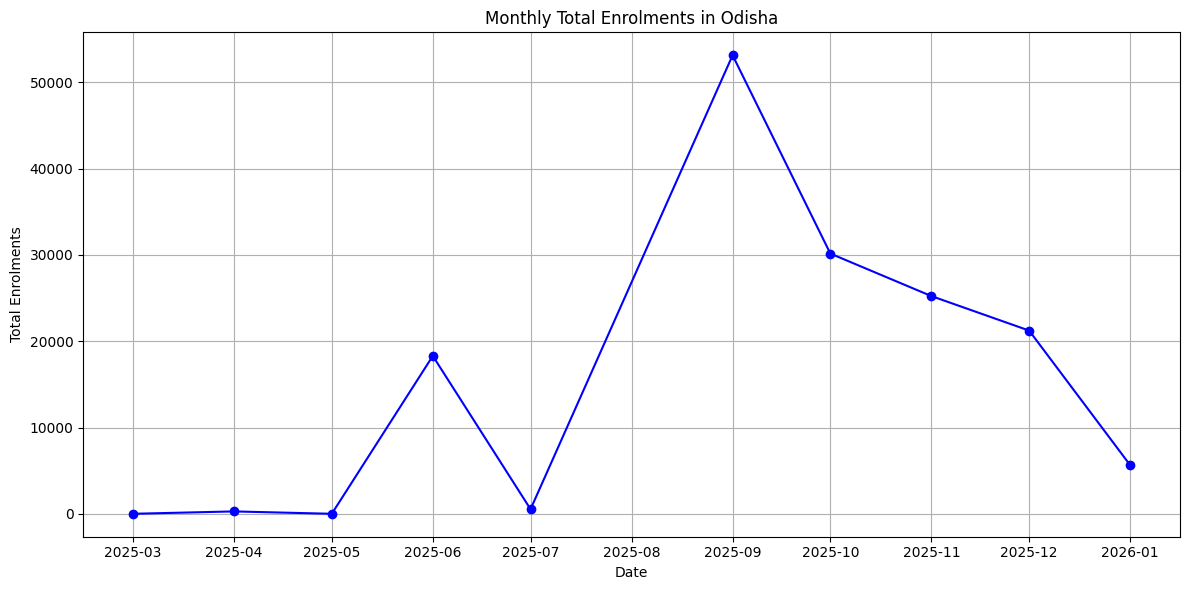

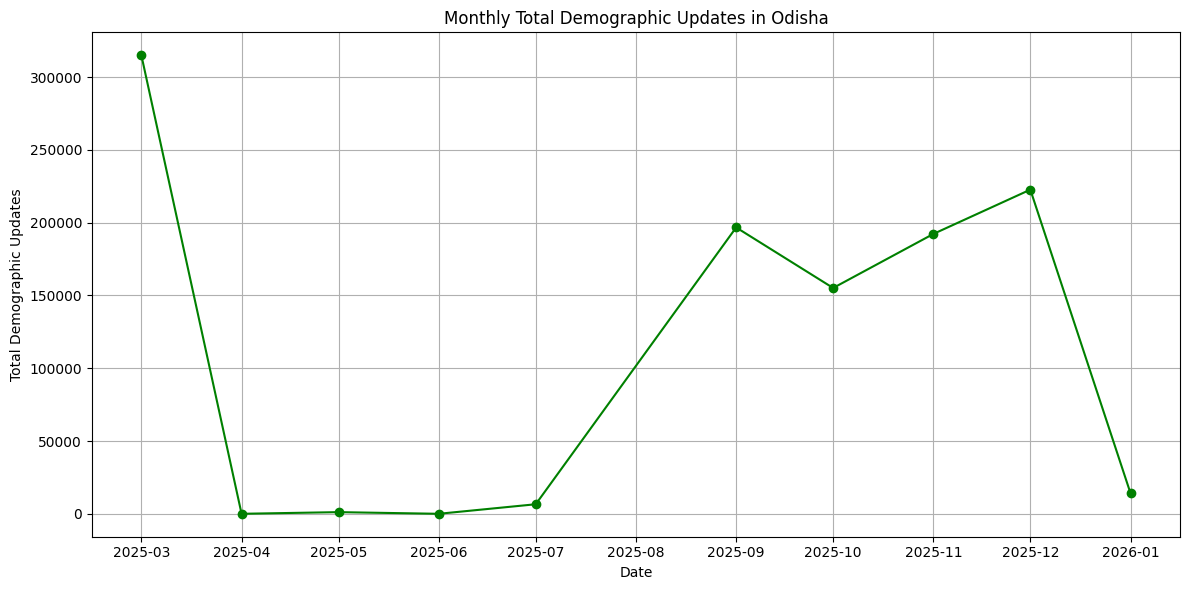

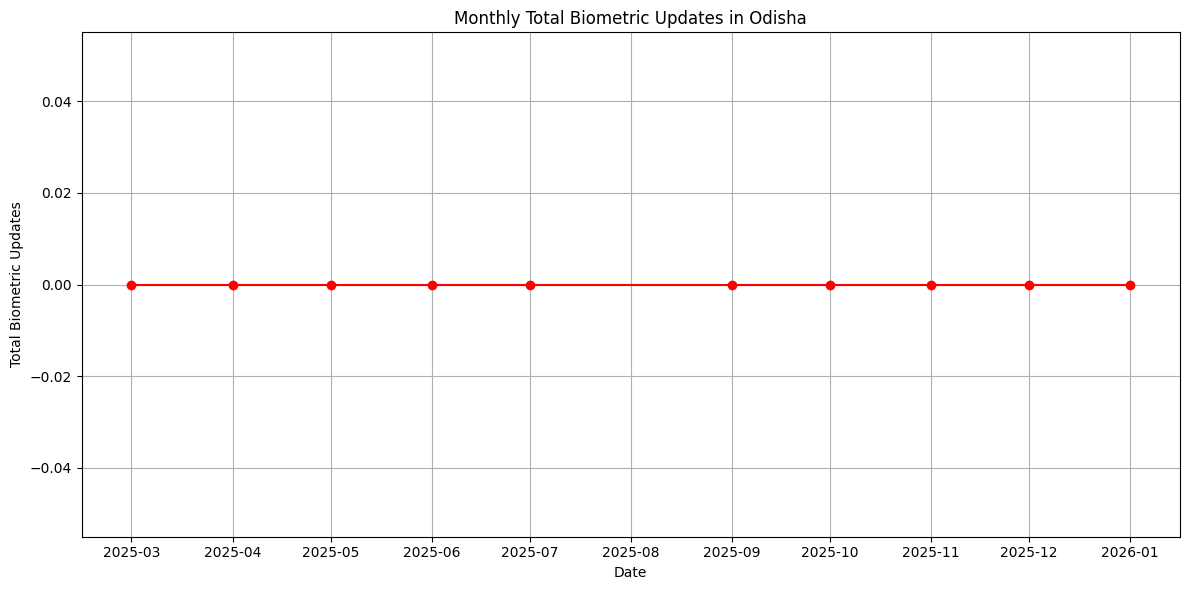

Monthly trend plots generated successfully.


In [476]:
import matplotlib.pyplot as plt

df_od_monthly_trends = df_od_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_od_monthly_trends['date'] = pd.to_datetime(df_od_monthly_trends['year'].astype(str) + '-' + df_od_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_od_monthly_trends = df_od_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_od_monthly_trends['date'], df_od_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Odisha')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_od_monthly_trends['date'], df_od_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Odisha')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_od_monthly_trends['date'], df_od_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Odisha')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

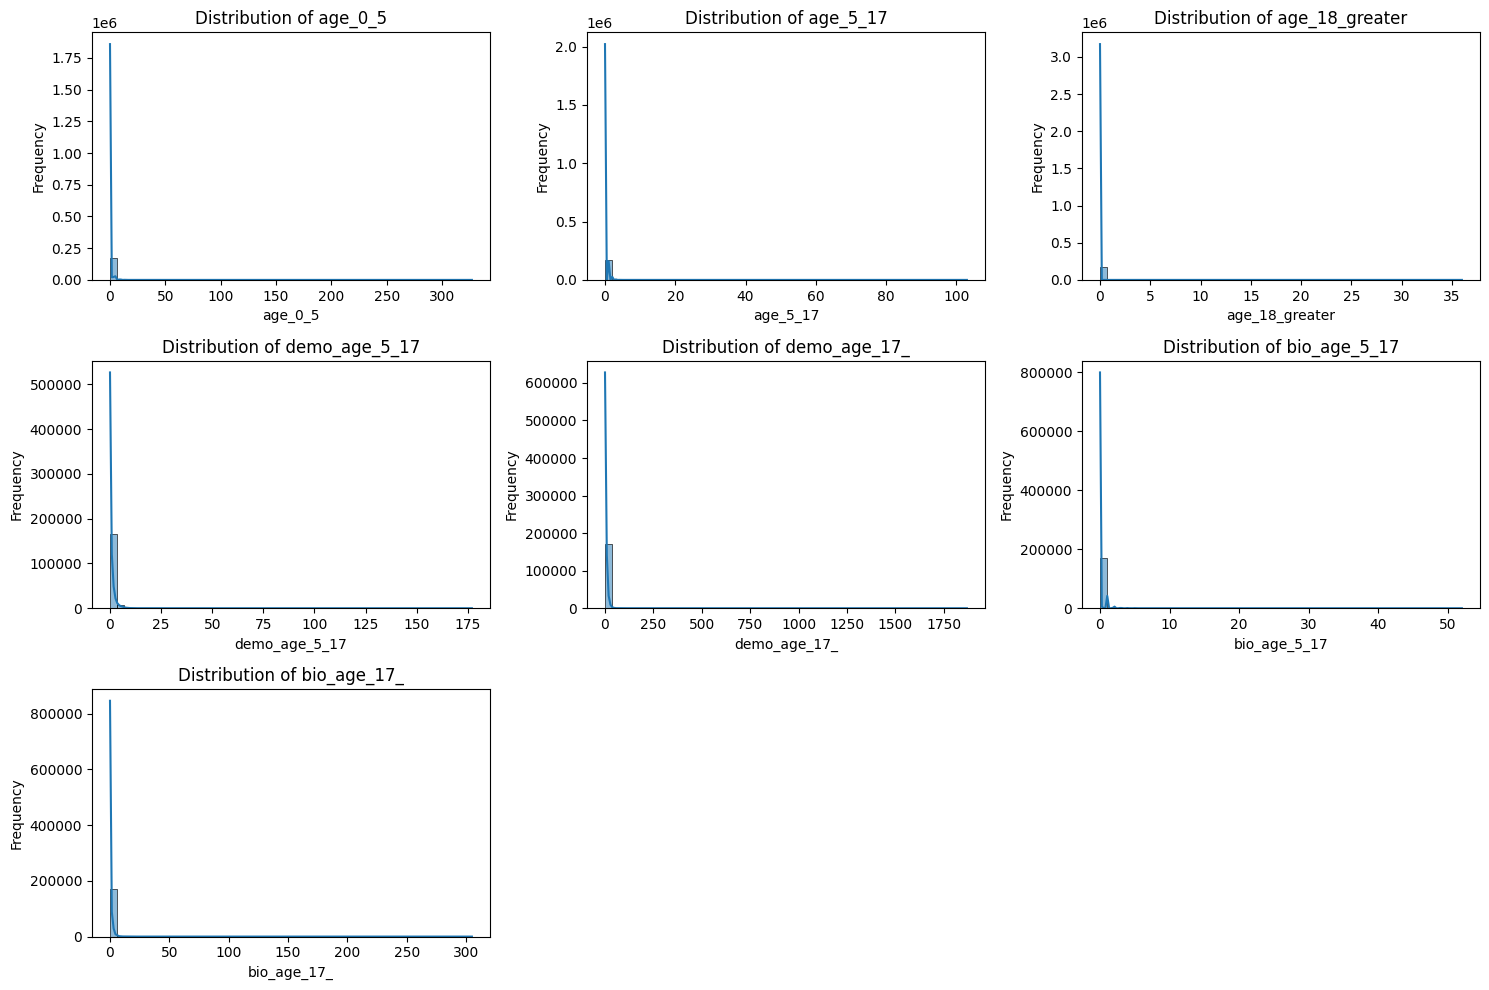

Histograms for numerical columns displayed.


In [477]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_od_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical columns displayed.")

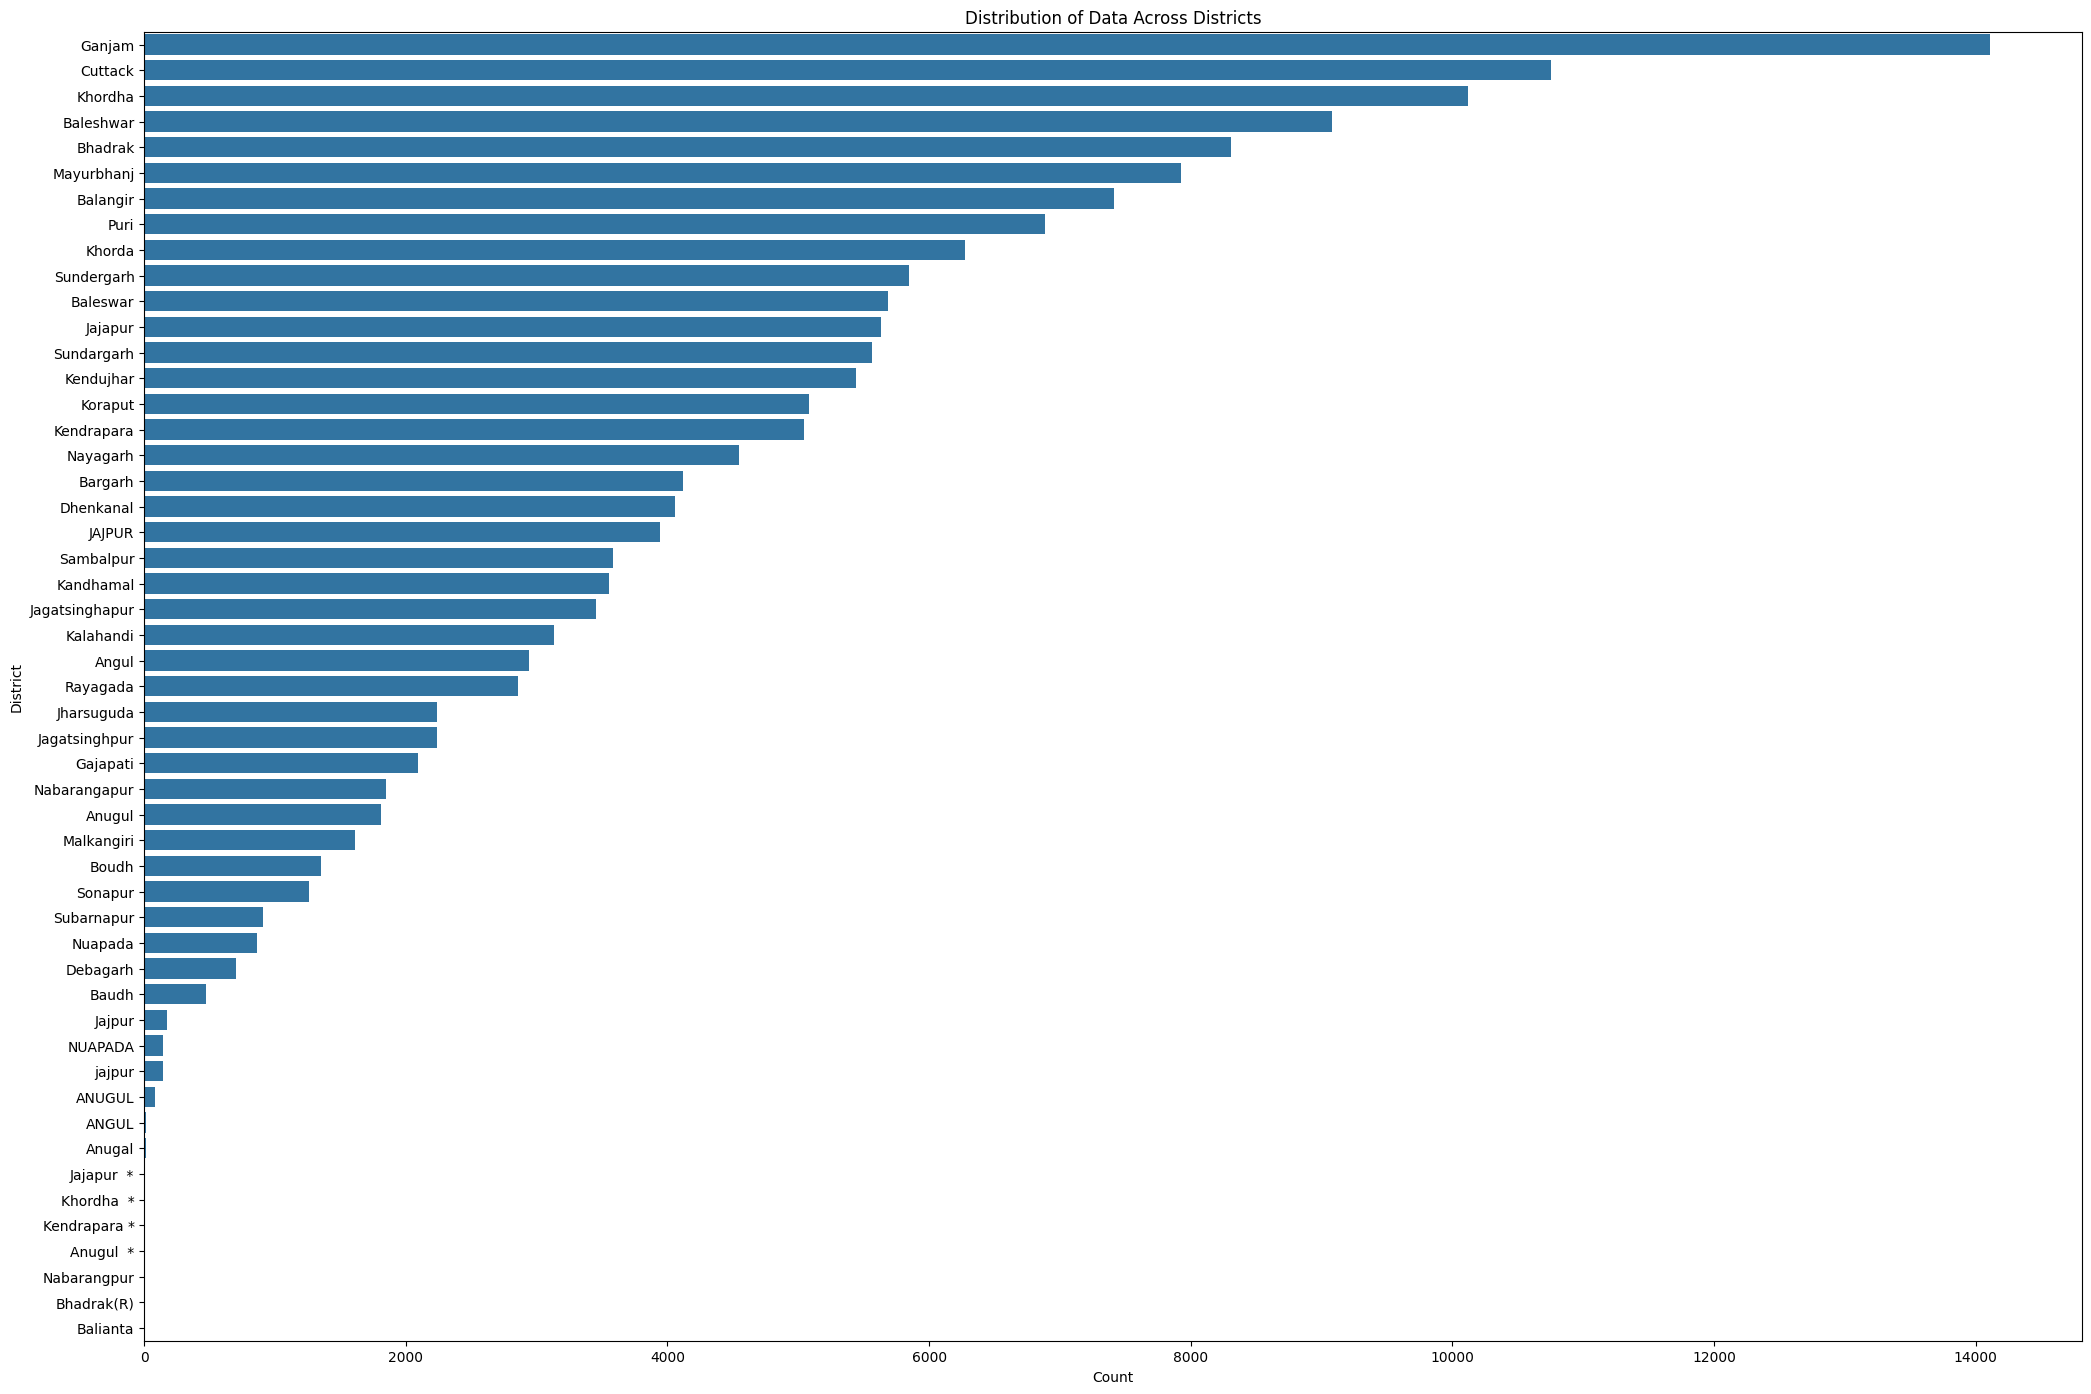

Count plot for 'district' displayed.


In [478]:
import seaborn as sns
plt.figure(figsize=(25, 17))
sns.countplot(data=df_od_merged, y='district', order=df_od_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed.")

**Bivariate and Trivariate Analysis**

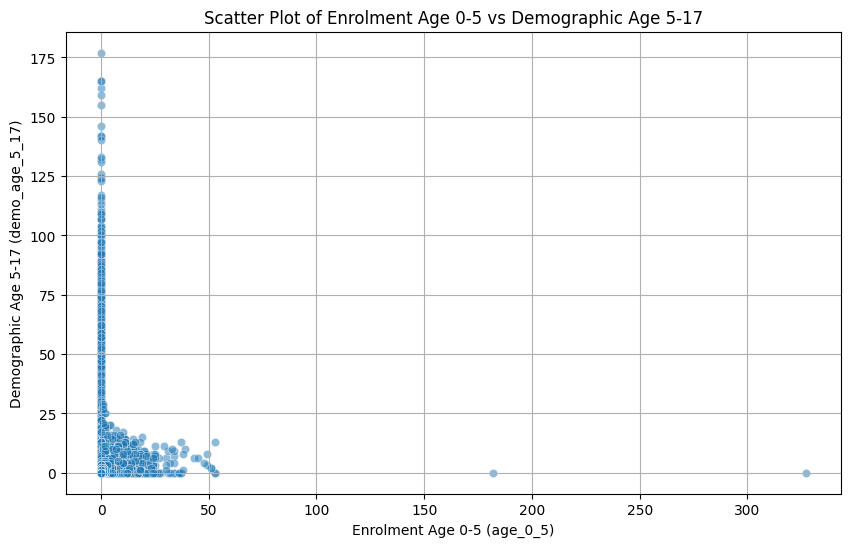

Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.


In [479]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_od_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.")

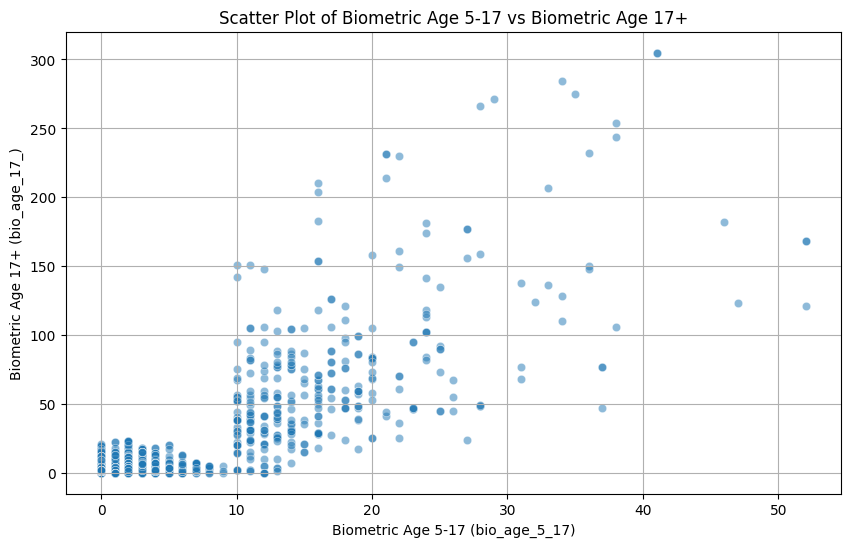

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.


In [480]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_od_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.")

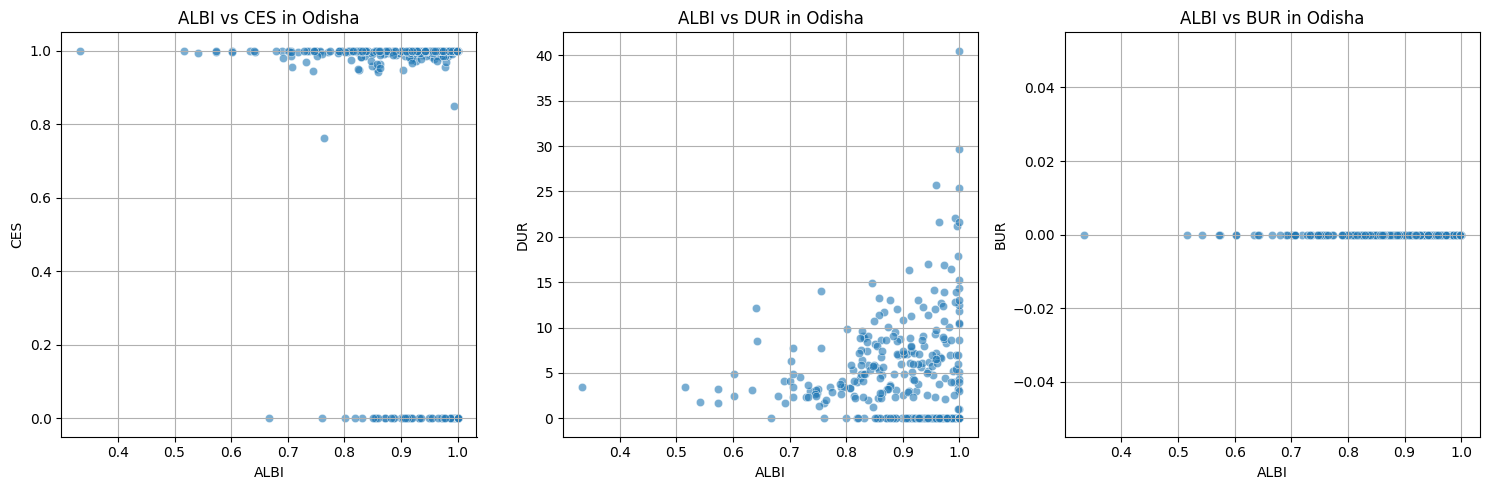

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_od_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Odisha')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

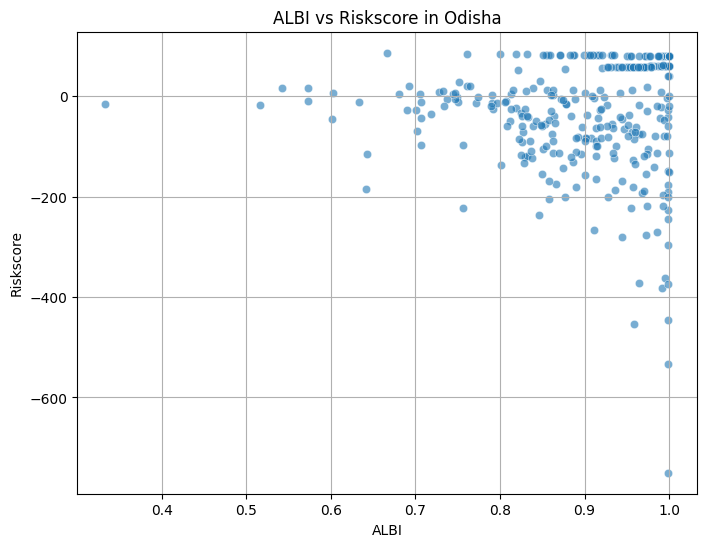

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Odisha.


In [482]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_od_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Odisha')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Odisha.")

Correlation Matrix:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.562162        0.138648       0.062006   
age_5_17        0.562162  1.000000        0.162590       0.046075   
age_18_greater  0.138648  0.162590        1.000000       0.004949   
demo_age_5_17   0.062006  0.046075        0.004949       1.000000   
demo_age_17_    0.047389  0.037689        0.003098       0.905056   
bio_age_5_17   -0.052186 -0.036717       -0.005055      -0.031852   
bio_age_17_    -0.056137 -0.039497       -0.005438      -0.034264   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.047389     -0.052186    -0.056137  
age_5_17            0.037689     -0.036717    -0.039497  
age_18_greater      0.003098     -0.005055    -0.005438  
demo_age_5_17       0.905056     -0.031852    -0.034264  
demo_age_17_        1.000000     -0.027478    -0.029558  
bio_age_5_17       -0.027478      1.000000     0.782870  
bio_age_17_        -0

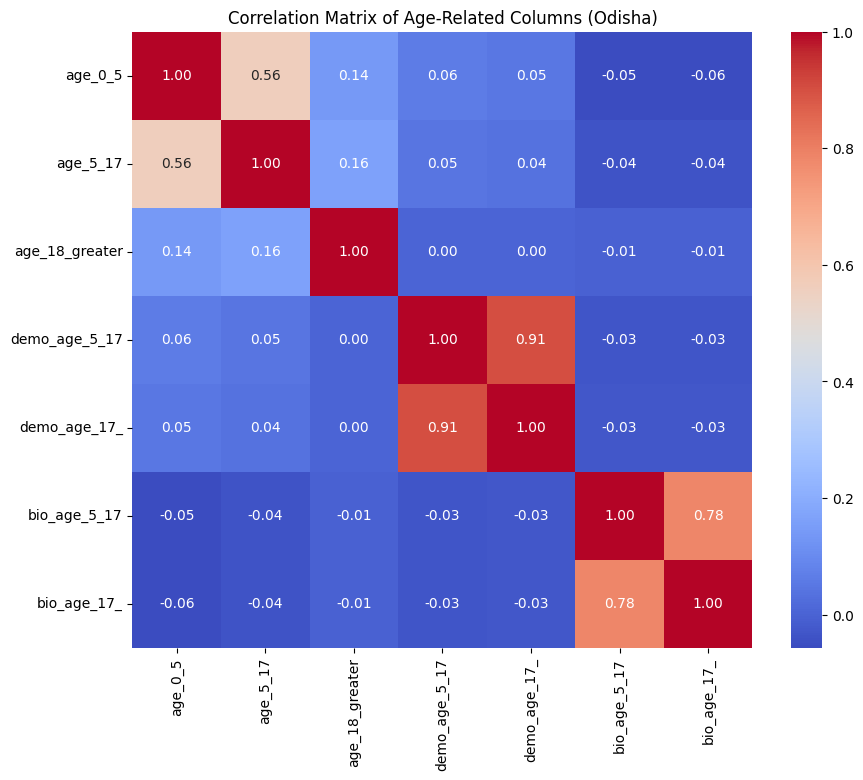

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [483]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix = df_od_merged[numerical_age_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Odisha)')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

In [484]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean = df_od_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data:")
print(df_district_mean.head())
print(df_district_mean.info())

District-wise average age-related data:
  district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0    ANGUL  0.066667  0.000000        0.000000       0.133333      0.933333   
1   ANUGUL  0.154762  0.035714        0.000000       0.071429      2.095238   
2    Angul  1.090353  0.195312        0.006454       1.283967      8.944633   
3   Anugal  0.100000  0.100000        0.000000       0.000000      0.900000   
4   Anugul  0.075732  0.018242        0.000000       0.048646      0.887783   

   bio_age_5_17  bio_age_17_  
0      0.000000     0.000000  
1      0.000000     0.000000  
2      0.000679     0.003397  
3      0.000000     0.000000  
4      0.079602     0.466003  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        51 non-null     object 
 1   age_0_5         51 non-null     float64
 2   age_5_17    

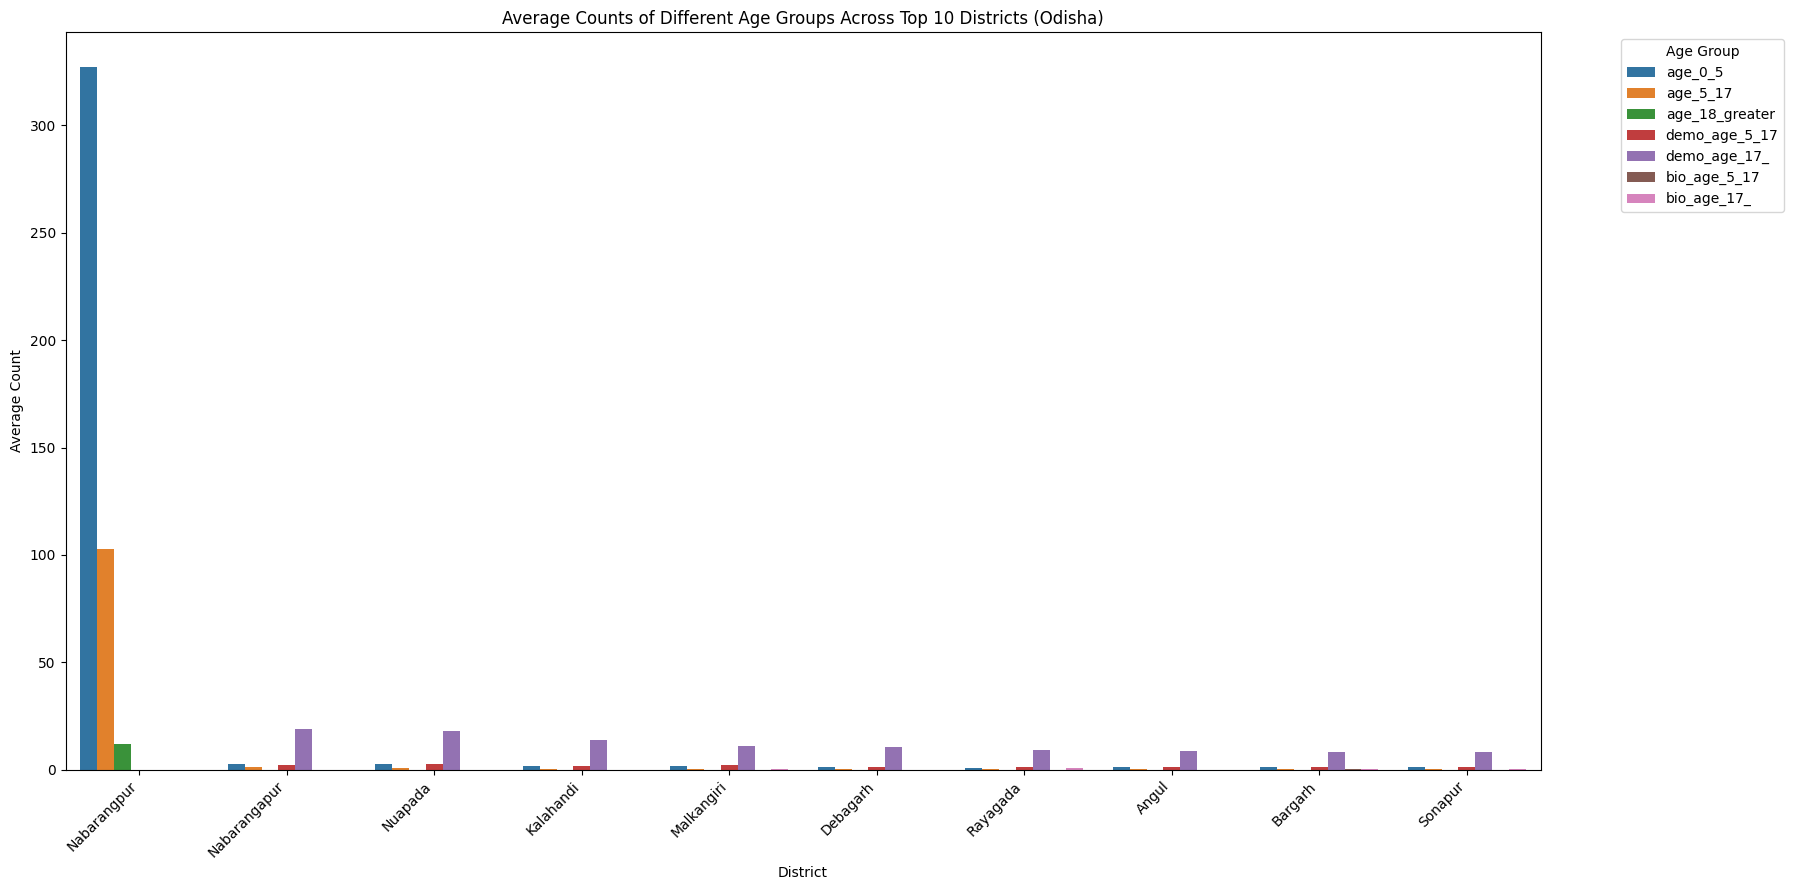

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts of Odisha, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [485]:
df_district_mean['total_avg_age'] = df_district_mean[age_cols_to_group].sum(axis=1)
df_district_mean_top10 = df_district_mean.nlargest(10, 'total_avg_age')

df_district_mean_melted = df_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Odisha)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts of Odisha, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date):
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        33865.0      281166.0   
1 2025-04-01    182.0      82.0            12.0            0.0           0.0   
2 2025-05-01      0.0       0.0             0.0          177.0         960.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0        1652.0       8521.0  
1        1671.0       6155.0  
2        1550.0       6187.0  
3          70.0        517.0  
4          92.0        464.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null    datetime64[ns]
 1   a

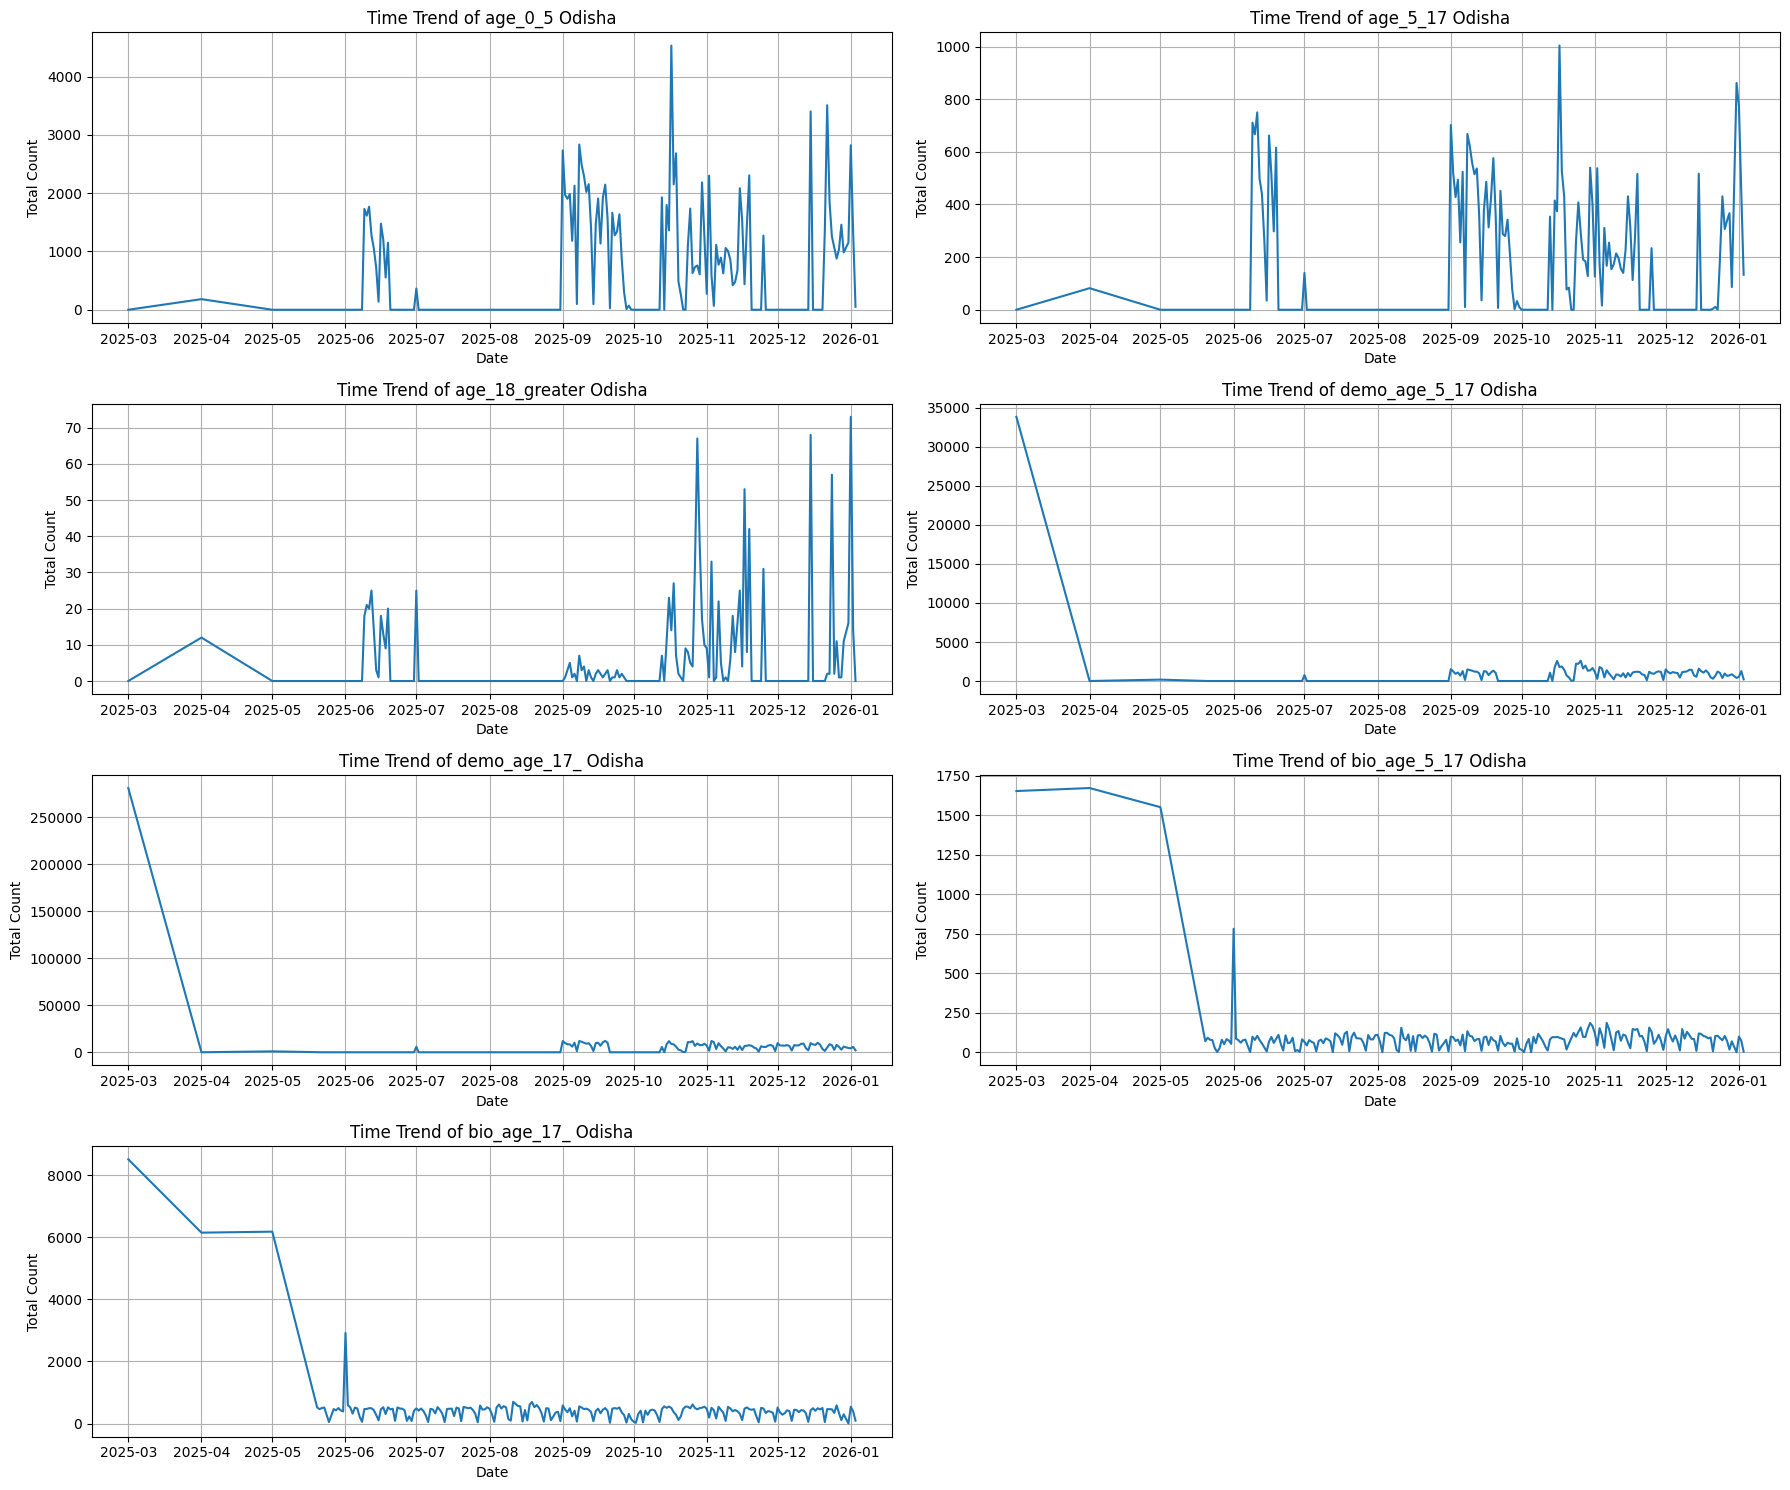

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [490]:
df_od_time_trend = df_od_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date):")
print(df_od_time_trend.head())
print(df_od_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_od_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} Odisha')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

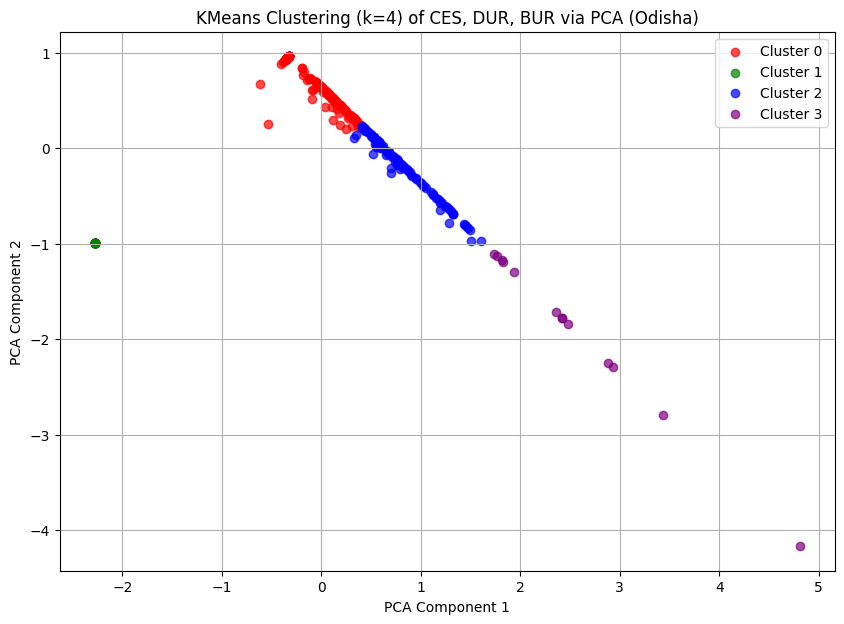

First 5 rows of df_od_agg with 'clusterlabel' column:
   year  month   state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Odisha      Angul      0.0       0.0             0.0   
1  2025      3  Odisha   Balangir      0.0       0.0             0.0   
2  2025      3  Odisha  Baleshwar      0.0       0.0             0.0   
3  2025      3  Odisha   Baleswar      0.0       0.0             0.0   
4  2025      3  Odisha    Bargarh      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  Bnorm   stdnorm      ALBI  \
0          946.0        7315.0           0.0  ...      0  0.091133  0.908867   
1          949.0        9326.0           0.0  ...      0  0.113351  0.886649   
2           52.0         469.0           0.0  ...      0  0.005748  0.994252   
3         2263.0       12980.0           0.0  ...      0  0.168156  0.831844   
4          862.0        8265.0           0.0  ...      0  0.100686  0.899314   

   Enormrisk  CESrisknorm  DURri

In [487]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_od_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_od_agg
df_od_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_od_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Odisha)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_od_agg with 'clusterlabel' column:")
print(df_od_agg.head())

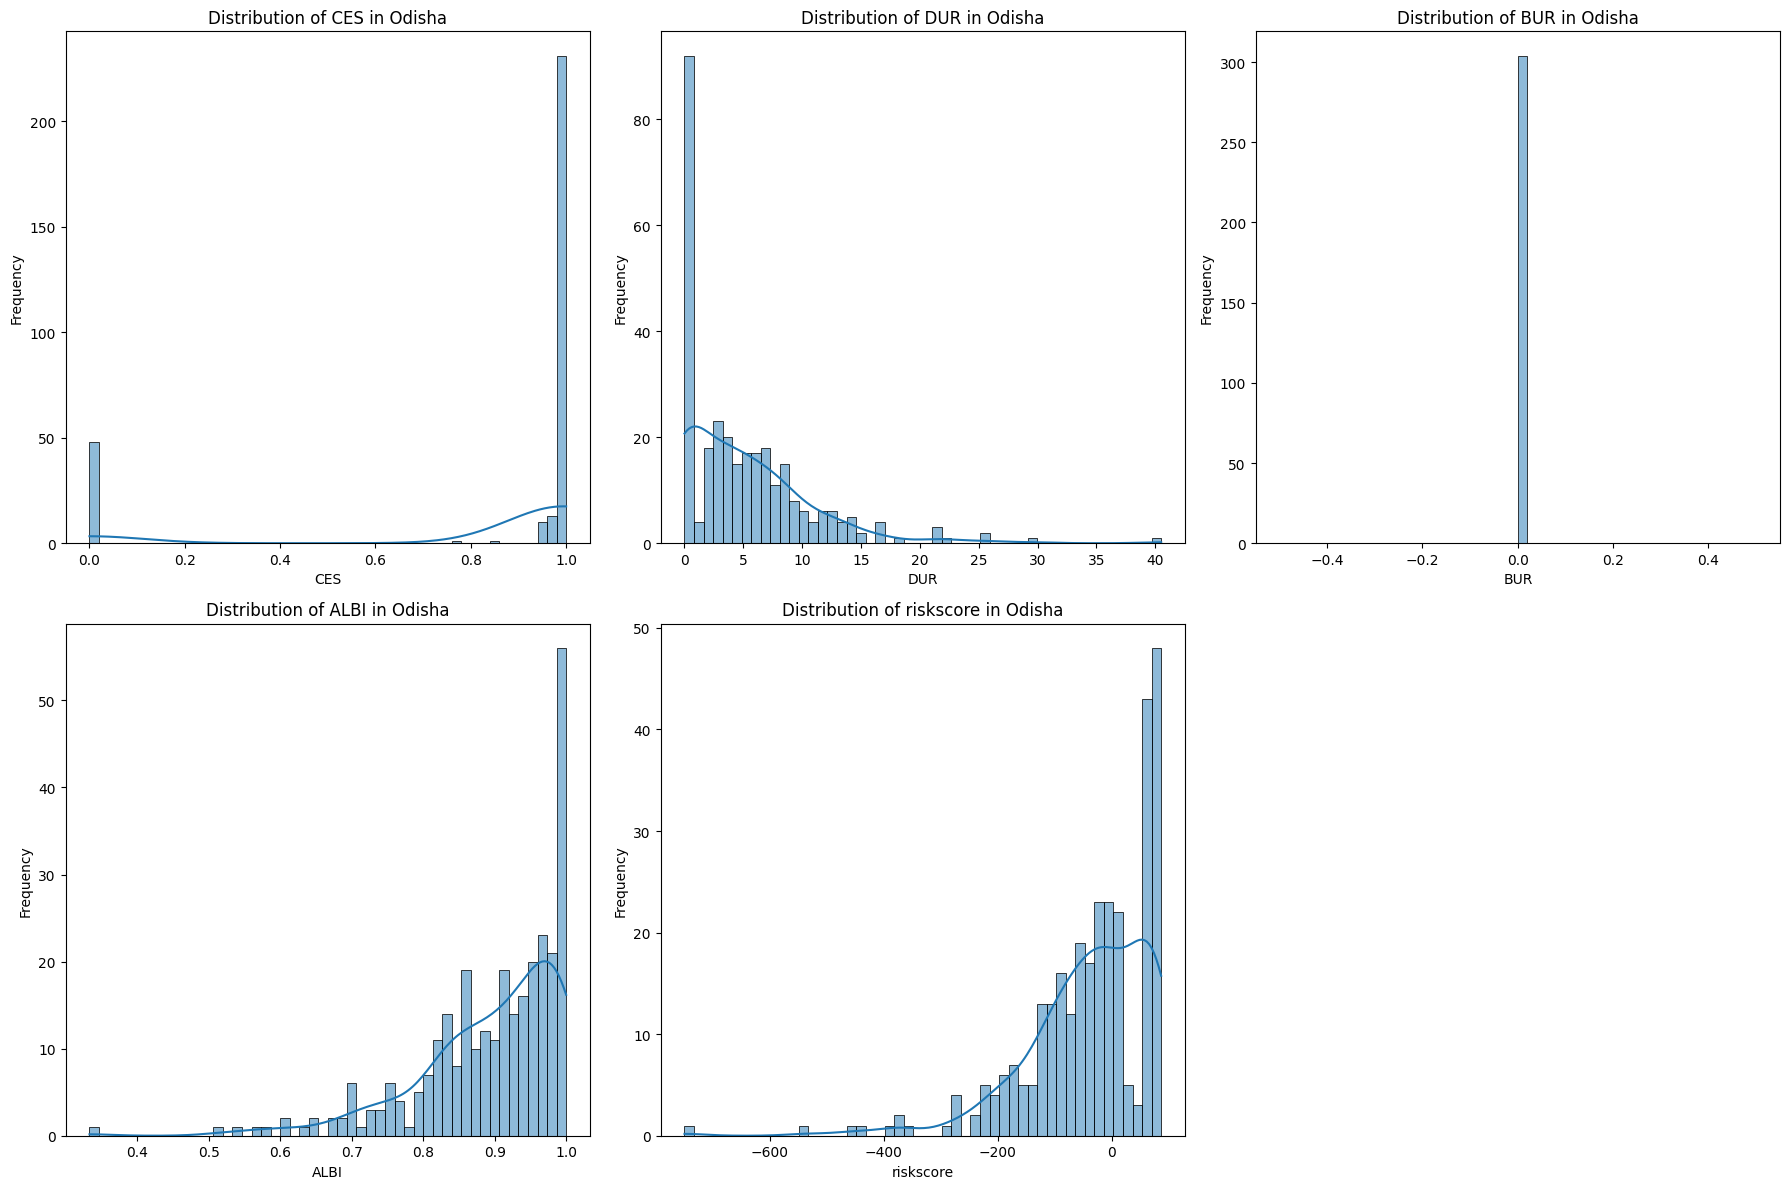

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [488]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_od_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Odisha')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")

In [489]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_od_agg['year'].max()
latest_month = df_od_agg[df_od_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_od_agg for the latest year and month
df_latest_month = df_od_agg[(df_od_agg['year'] == latest_year) & (df_od_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
 district  CES
   ANUGUL  1.0
    Angul  1.0
   Anugul  1.0
Baleshwar  1.0
    Boudh  1.0
    Baudh  1.0
   Ganjam  1.0
   JAJPUR  1.0
Dhenkanal  1.0
 Gajapati  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
      district      CES
        Jajpur 0.000000
       Koraput 0.763158
       Bhadrak 0.945355
     Kalahandi 0.956757
      Debagarh 0.967742
    Kendrapara 0.970443
      Balangir 0.980989
  Nabarangapur 0.986842
       Nuapada 0.988372
Jagatsinghapur 0.989583

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
  district      DUR
 Baleshwar 7.100000
    jajpur 7.000000
   Khordha 6.555556
   NUAPADA 6.000000
Sundargarh 5.033333
Jharsuguda 4.195652
    Anugul 4.000000
 Kalahandi 3.491892
    Ganjam 3.459716
  Gajapati 3.280488

Bottom 10 Districts by DUR (Year 2026, Month 1):
    district      DUR
      Jajpur 0.000000
      ANUGUL 1.000000
Nabar

## Summary (Odisha):

The Aadhaar lifecycle analysis for Odisha provides insights into the enrolment and update activities across its districts. The `df_od_agg` dataset, aggregated by month and district, serves as the basis for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were loaded, their 'date' columns converted to datetime objects, and merged into a single `df_od_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were computed. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were calculated, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Consistent with observations in other states, significant negative risk scores were noted for many districts, highlighting a persistent issue with the metric's definition or calculation that requires further investigation to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates revealed monthly fluctuations, indicating periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Several districts achieved a perfect CES of 1.0, indicating all enrolments were child enrolments in the latest period. Some districts had a CES of 0.0, suggesting no child enrolments were recorded for these districts in the latest month.
    *   **DUR (Demographic Update Rate)**: Some districts exhibited exceptionally high demographic update rates relative to enrolments, which warrants further investigation into data reporting or specific update drives. Some districts reported a DUR of 0.0.
    *   **BUR (Biometric Update Rate)**: Some districts had the highest biometric update rates. Similar to DUR, several districts showed a BUR of 0.0.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Some districts showed the best balance, close to 1. Other districts had the lowest ALBI, indicating a significant imbalance.
    *   **Risk Score**: Some districts showed the highest positive risk scores. However, a large number of districts displayed very large negative risk scores, reinforcing the consistent issue with this metric across multiple states. This anomaly makes the metric uninterpretable as a direct risk indicator in its current form.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into distinct clusters based on their CES, DUR, and BUR metrics, visualized via PCA. This highlights different operational profiles and performance levels across Odisha's districts.

### Conclusion:

Odisha exhibits varied performance across its districts in Aadhaar lifecycle management. While some districts show strong activity and balance, others face challenges with enrolments and update rates, with several reporting zero activity in certain categories. The persistent issue with negative `riskscore` values across multiple states, including Odisha, is a critical concern that requires immediate attention and refinement of the metric's calculation to ensure accuracy and utility. Targeted interventions should focus on districts with low update rates, imbalanced ALBI values, and problematic risk scores to improve overall Aadhaar data quality and lifecycle management. The exceptionally high DUR and BUR values in some districts also warrant a closer look to confirm data validity.